In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2024-04-05 03:19:56.047319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 03:19:56.047472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 03:19:56.213881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.15.0


In [3]:
# Create a list with the filepaths for training and testing
train_dir = Path('../input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [4]:
test_dir = Path('../input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [5]:
val_dir = Path('../input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [6]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [7]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [8]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['pear' 'garlic' 'kiwi' 'watermelon' 'mango' 'sweetcorn' 'beetroot'
 'jalepeno' 'capsicum' 'orange' 'carrot' 'cabbage' 'potato' 'pineapple'
 'peas' 'tomato' 'corn' 'chilli pepper' 'bell pepper' 'sweetpotato'
 'ginger' 'eggplant' 'soy beans' 'grapes' 'turnip' 'onion' 'banana'
 'pomegranate' 'cucumber' 'raddish' 'lettuce' 'lemon' 'paprika' 'spinach'
 'cauliflower' 'apple']


In [9]:
train_df.head(5)

,Filepath,Label
0,../input/fruit-and-vegetable-image-recognition...,pear
1,../input/fruit-and-vegetable-image-recognition...,garlic
2,../input/fruit-and-vegetable-image-recognition...,kiwi
3,../input/fruit-and-vegetable-image-recognition...,garlic
4,../input/fruit-and-vegetable-image-recognition...,watermelon


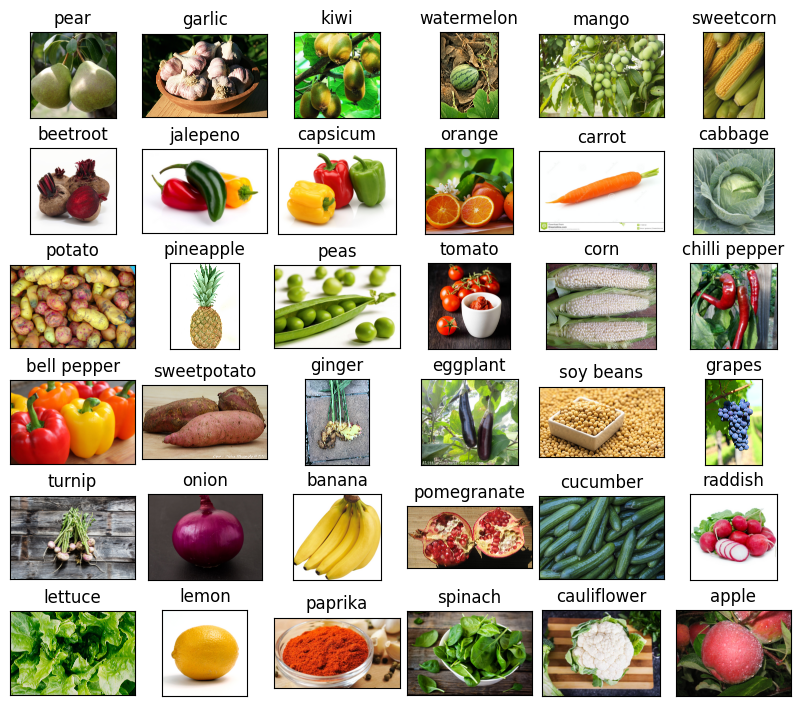

In [10]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [13]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [14]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [15]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.3460 - loss: 2.5595 - val_accuracy: 0.8413 - val_loss: 0.4846
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8177 - loss: 0.5865 - val_accuracy: 0.9102 - val_loss: 0.2844
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8902 - loss: 0.3510 - val_accuracy: 0.9401 - val_loss: 0.2273
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9331 - loss: 0.2086 - val_accuracy: 0.9461 - val_loss: 0.1614
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9614 - loss: 0.1393 - val_accuracy: 0.9341 - val_loss: 0.1946
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9645 - loss: 0.1102 - val_accuracy: 0.9551 - val_loss: 0.1299
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9750 - loss: 0.0802 - val_accuracy: 0.9641 - val_loss: 0.1532
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9850 - loss: 0.0583 - val_accuracy: 0.9491 - val_loss: 0.

In [17]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


['sweetcorn',
 'pineapple',
 'sweetpotato',
 'capsicum',
 'ginger',
 'raddish',
 'sweetpotato',
 'soy beans',
 'pomegranate',
 'cabbage',
 'cabbage',
 'grapes',
 'bell pepper',
 'lettuce',
 'pear',
 'pear',
 'paprika',
 'soy beans',
 'garlic',
 'tomato',
 'garlic',
 'paprika',
 'onion',
 'ginger',
 'pear',
 'chilli pepper',
 'apple',
 'orange',
 'sweetpotato',
 'ginger',
 'paprika',
 'raddish',
 'cucumber',
 'watermelon',
 'orange',
 'tomato',
 'soy beans',
 'banana',
 'chilli pepper',
 'sweetcorn',
 'lemon',
 'eggplant',
 'pineapple',
 'paprika',
 'potato',
 'lettuce',
 'raddish',
 'turnip',
 'lettuce',
 'lettuce',
 'apple',
 'eggplant',
 'potato',
 'watermelon',
 'watermelon',
 'turnip',
 'corn',
 'raddish',
 'cauliflower',
 'chilli pepper',
 'sweetcorn',
 'onion',
 'beetroot',
 'soy beans',
 'banana',
 'kiwi',
 'eggplant',
 'bell pepper',
 'beetroot',
 'carrot',
 'kiwi',
 'tomato',
 'potato',
 'chilli pepper',
 'watermelon',
 'spinach',
 'spinach',
 'pomegranate',
 'raddish',
 'eggp

In [18]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [19]:
img = output('../input/fruit-and-vegetable-image-recognition/test/cabbage/Image_1.jpg')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'cabbage'

In [20]:
model.save('FV.h5')